In [1]:
#Apply Logistic Regression and KNN classifier.
# Make Visualization for KNN & Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv('shoe.csv')

In [4]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


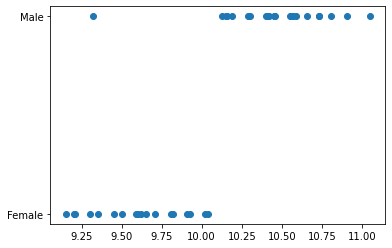

In [5]:
plt.scatter(df['size(cm)'], df['class(y)'])

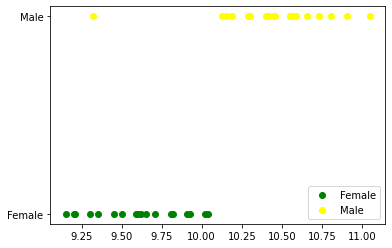

In [6]:
df0 = df[df['class(y)'] == 'Female']
df1 = df[df['class(y)'] == 'Male']

plt.scatter(df0['size(cm)'], df0['class(y)'], color='green', label='Female')
plt.scatter(df1['size(cm)'], df1['class(y)'], color='yellow', label='Male')

plt.legend()


In [7]:
#preprocessing
df['class(y)'] = df['class(y)'].replace(['Male', 'Female'], [1,0])

In [8]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   size(cm)  40 non-null     float64
 1   class(y)  40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(df[['size(cm)']], df['class(y)'], test_size=.30, random_state=1)

In [12]:
xtrain.head()

,size(cm)
30,10.04
36,9.21
33,9.59
28,10.45
4,11.05


In [13]:
ytrain.head()

30    0
36    0
33    0
28    1
4     1
Name: class(y), dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
reg = LogisticRegression()

In [16]:
reg.fit(xtrain, ytrain)

LogisticRegression()

In [17]:
reg.coef_

array([[2.47032006]])

In [18]:
reg.intercept_

array([-24.68727138])

In [19]:
reg.predict_proba(xtest)

array([[0.26332448, 0.73667552],
       [0.55141748, 0.44858252],
       [0.61145481, 0.38854519],
       [0.83058498, 0.16941502],
       [0.11744111, 0.88255889],
       [0.13952234, 0.86047766],
       [0.87656832, 0.12343168],
       [0.84075928, 0.15924072],
       [0.18642364, 0.81357636],
       [0.32468537, 0.67531463],
       [0.26814446, 0.73185554],
       [0.53916788, 0.46083212]])

In [20]:
reg.predict(xtest)

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [21]:
ytest

2     1
31    0
3     0
21    0
27    1
29    1
22    0
39    1
19    1
26    1
32    1
17    0
Name: class(y), dtype: int64

In [22]:
ypred = reg.predict(xtest)
ypred

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [23]:
logit = reg.score(xtest, ytest)
logit

0.9166666666666666

In [24]:
#KNN Classifier

# Import Library

In [25]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns # analysis / visualization
sns.set(color_codes=True)
from seaborn import barplot
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

import warnings as w
w.filterwarnings('ignore')

In [26]:
KNN = KNeighborsClassifier(n_neighbors = 5)

In [27]:
KNN

KNeighborsClassifier()

In [28]:
KNN.fit(xtrain,ytrain)

KNeighborsClassifier()

In [29]:
ypred1 = KNN.predict(xtest)

In [30]:
ypred1

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [31]:
classification_report(ytest, ypred1)

'              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91         5\n           1       1.00      0.86      0.92         7\n\n    accuracy                           0.92        12\n   macro avg       0.92      0.93      0.92        12\nweighted avg       0.93      0.92      0.92        12\n'

In [32]:
print(classification_report(ytest, ypred1))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.86      0.92         7

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.93      0.92      0.92        12



In [33]:
CM = confusion_matrix(ytest, ypred1)
CM

array([[5, 0],
       [1, 6]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

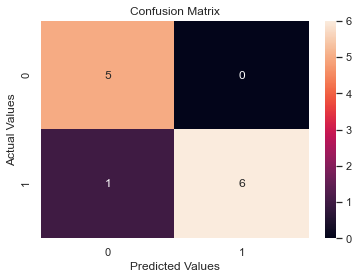

In [34]:
sns.heatmap(CM, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [35]:
tp, fn, fp, tn = confusion_matrix(ytest, ypred1).reshape(-1)

In [36]:
tp, fn, fp, tn

(5, 0, 1, 6)

In [37]:
accuracy_score(ytest, ypred1)

0.9166666666666666

In [38]:
knn_acc = KNN.score(xtest, ytest)
knn_acc

0.9166666666666666

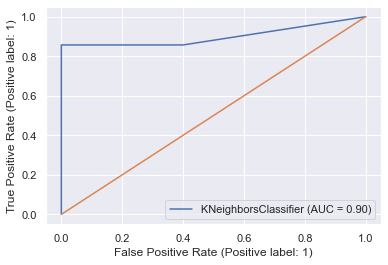

In [39]:
plot_roc_curve(KNN, xtest, ytest)
plt.plot([0,1],[0,1])

In [40]:
# Make Visualization for KNN & Logistic Regression 

In [41]:
# Creating DataFrame for All Accuracy
accuracy_df = pd.DataFrame([['KNN', knn_acc], ['Logistic Regression', logit]], columns=['Algorithm Name', 'Accuracy'])


In [42]:
accuracy_df

,Algorithm Name,Accuracy
0,KNN,0.916667
1,Logistic Regression,0.916667


In [43]:
accuracy_df.nlargest(1,'Accuracy') # largest accuracy

,Algorithm Name,Accuracy
0,KNN,0.916667


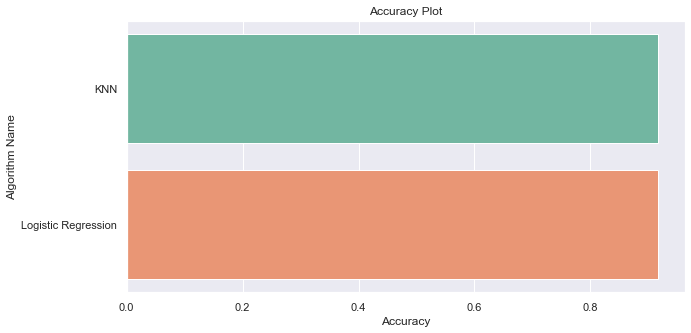

In [51]:
sns.set()
sns.barplot(y="Algorithm Name", x="Accuracy",  data=accuracy_df, palette="Set2").set(title='Accuracy Plot')
sns.set(rc={'figure.figsize':(10,5)})